# Facebook Data Crawling
After the data is collected, we need to process the data to make it more readable and easier to analyze. We can do some simple visualization to see the data distribution and the relationship between the data. We can also do some simple data cleaning to remove the data that is not needed. In this notebook, we will do some simple data processing on the data we collected from Facebook.

In [27]:
%pip install matplotlib pandas numpy seaborn wordcloud

Note: you may need to restart the kernel to use updated packages.


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer


In [29]:
# ƒê·ªçc d·ªØ li·ªáu t·ª´ t·ªáp CSV
raw_df = pd.read_csv('Data/thehackernews10_preprocessed.csv')

In [30]:
# Hi·ªÉn th·ªã th√¥ng tin v·ªÅ d·ªØ li·ªáu
print(raw_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_id                        100 non-null    int64  
 1   text                           100 non-null    object 
 2   post_text                      100 non-null    object 
 3   shared_text                    100 non-null    object 
 4   original_text                  0 non-null      float64
 5   time                           100 non-null    object 
 6   timestamp                      100 non-null    int64  
 7   image                          100 non-null    object 
 8   image_lowquality               100 non-null    object 
 9   images                         100 non-null    object 
 10  images_description             100 non-null    object 
 11  images_lowquality              100 non-null    object 
 12  images_lowquality_description  100 non-null    obje

## Reactions analysis

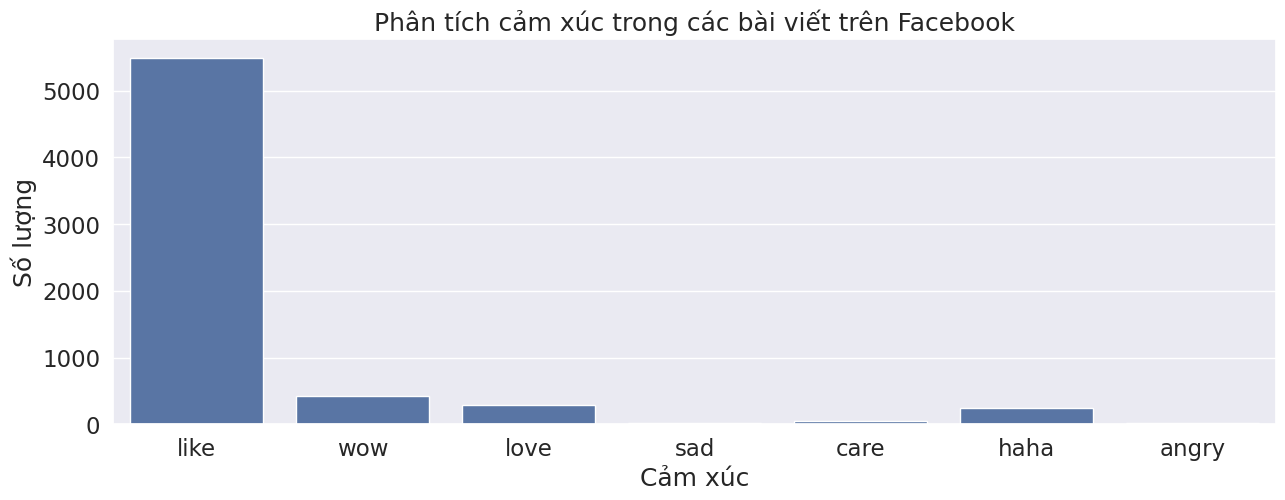

In [31]:
# Chuy·ªÉn ƒë·ªïi chu·ªói trong c·ªôt 'reactions' th√†nh t·ª´ ƒëi·ªÉn
raw_df['reactions'] = raw_df['reactions'].apply(eval)

# T√≠nh t·ªïng s·ªë l∆∞·ª£t t∆∞∆°ng t√°c cho m·ªói b√†i vi·∫øt
raw_df['total_interactions'] = raw_df['reactions'].apply(lambda x: sum(x.values())) + raw_df['shares'] + raw_df['comments']

# T·∫°o DataFrame ƒë·ªÉ l∆∞u tr·ªØ th√¥ng tin v·ªÅ c√°c lo·∫°i ph·∫£n ·ª©ng
reaction_df = pd.DataFrame(raw_df['reactions'].tolist())

# T√≠nh t·ªïng s·ªë l∆∞·ª£t t∆∞∆°ng t√°c cho m·ªói lo·∫°i ph·∫£n ·ª©ng
reaction_counts = reaction_df.sum()

# Tr·ª±c quan h√≥a s·ªë l∆∞·ª£ng c·∫£m x√∫c b·∫±ng bi·ªÉu ƒë·ªì c·ªôt
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15, 5)})
sns.set(font_scale=1.5)

fig, ax = plt.subplots()
ax = sns.barplot(x=reaction_counts.index, y=reaction_counts.values)
ax.set_title("Ph√¢n t√≠ch c·∫£m x√∫c trong c√°c b√†i vi·∫øt tr√™n Facebook")
ax.set_ylabel("S·ªë l∆∞·ª£ng")
ax.set_xlabel("C·∫£m x√∫c")
plt.xticks(rotation=0)
plt.show()


## Comment and Share analysis


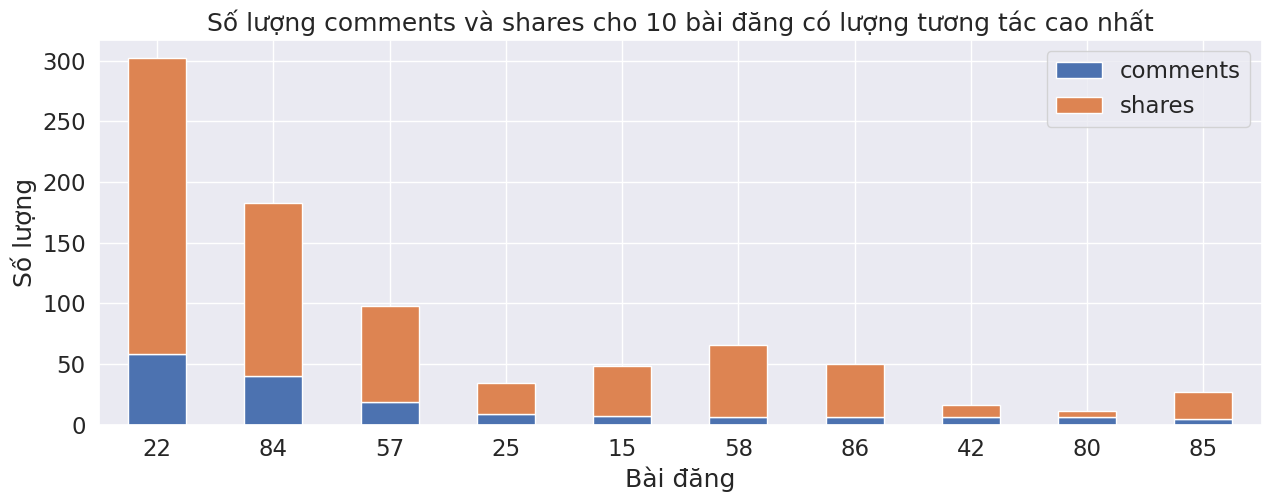

In [33]:
# L·∫•y 10 b√†i ƒëƒÉng c√≥ s·ªë l∆∞·ª£ng comments v√† shares cao nh·∫•t
top_comments_shares_df = raw_df[['comments', 'shares']].nlargest(10, ['comments', 'shares'])

# V·∫Ω bi·ªÉu ƒë·ªì
top_comments_shares_df.plot(kind='bar', stacked=True)
plt.title("S·ªë l∆∞·ª£ng comments v√† shares cho 10 b√†i ƒëƒÉng c√≥ l∆∞·ª£ng t∆∞∆°ng t√°c cao nh·∫•t")
plt.ylabel("S·ªë l∆∞·ª£ng")
plt.xlabel("B√†i ƒëƒÉng")
plt.xticks(rotation=0)
plt.show()



## Read all posts

In [34]:
# ƒê·ªçc t·∫•t c·∫£ c√°c b√†i ƒëƒÉng
text = ' '.join(raw_df['post_text'])

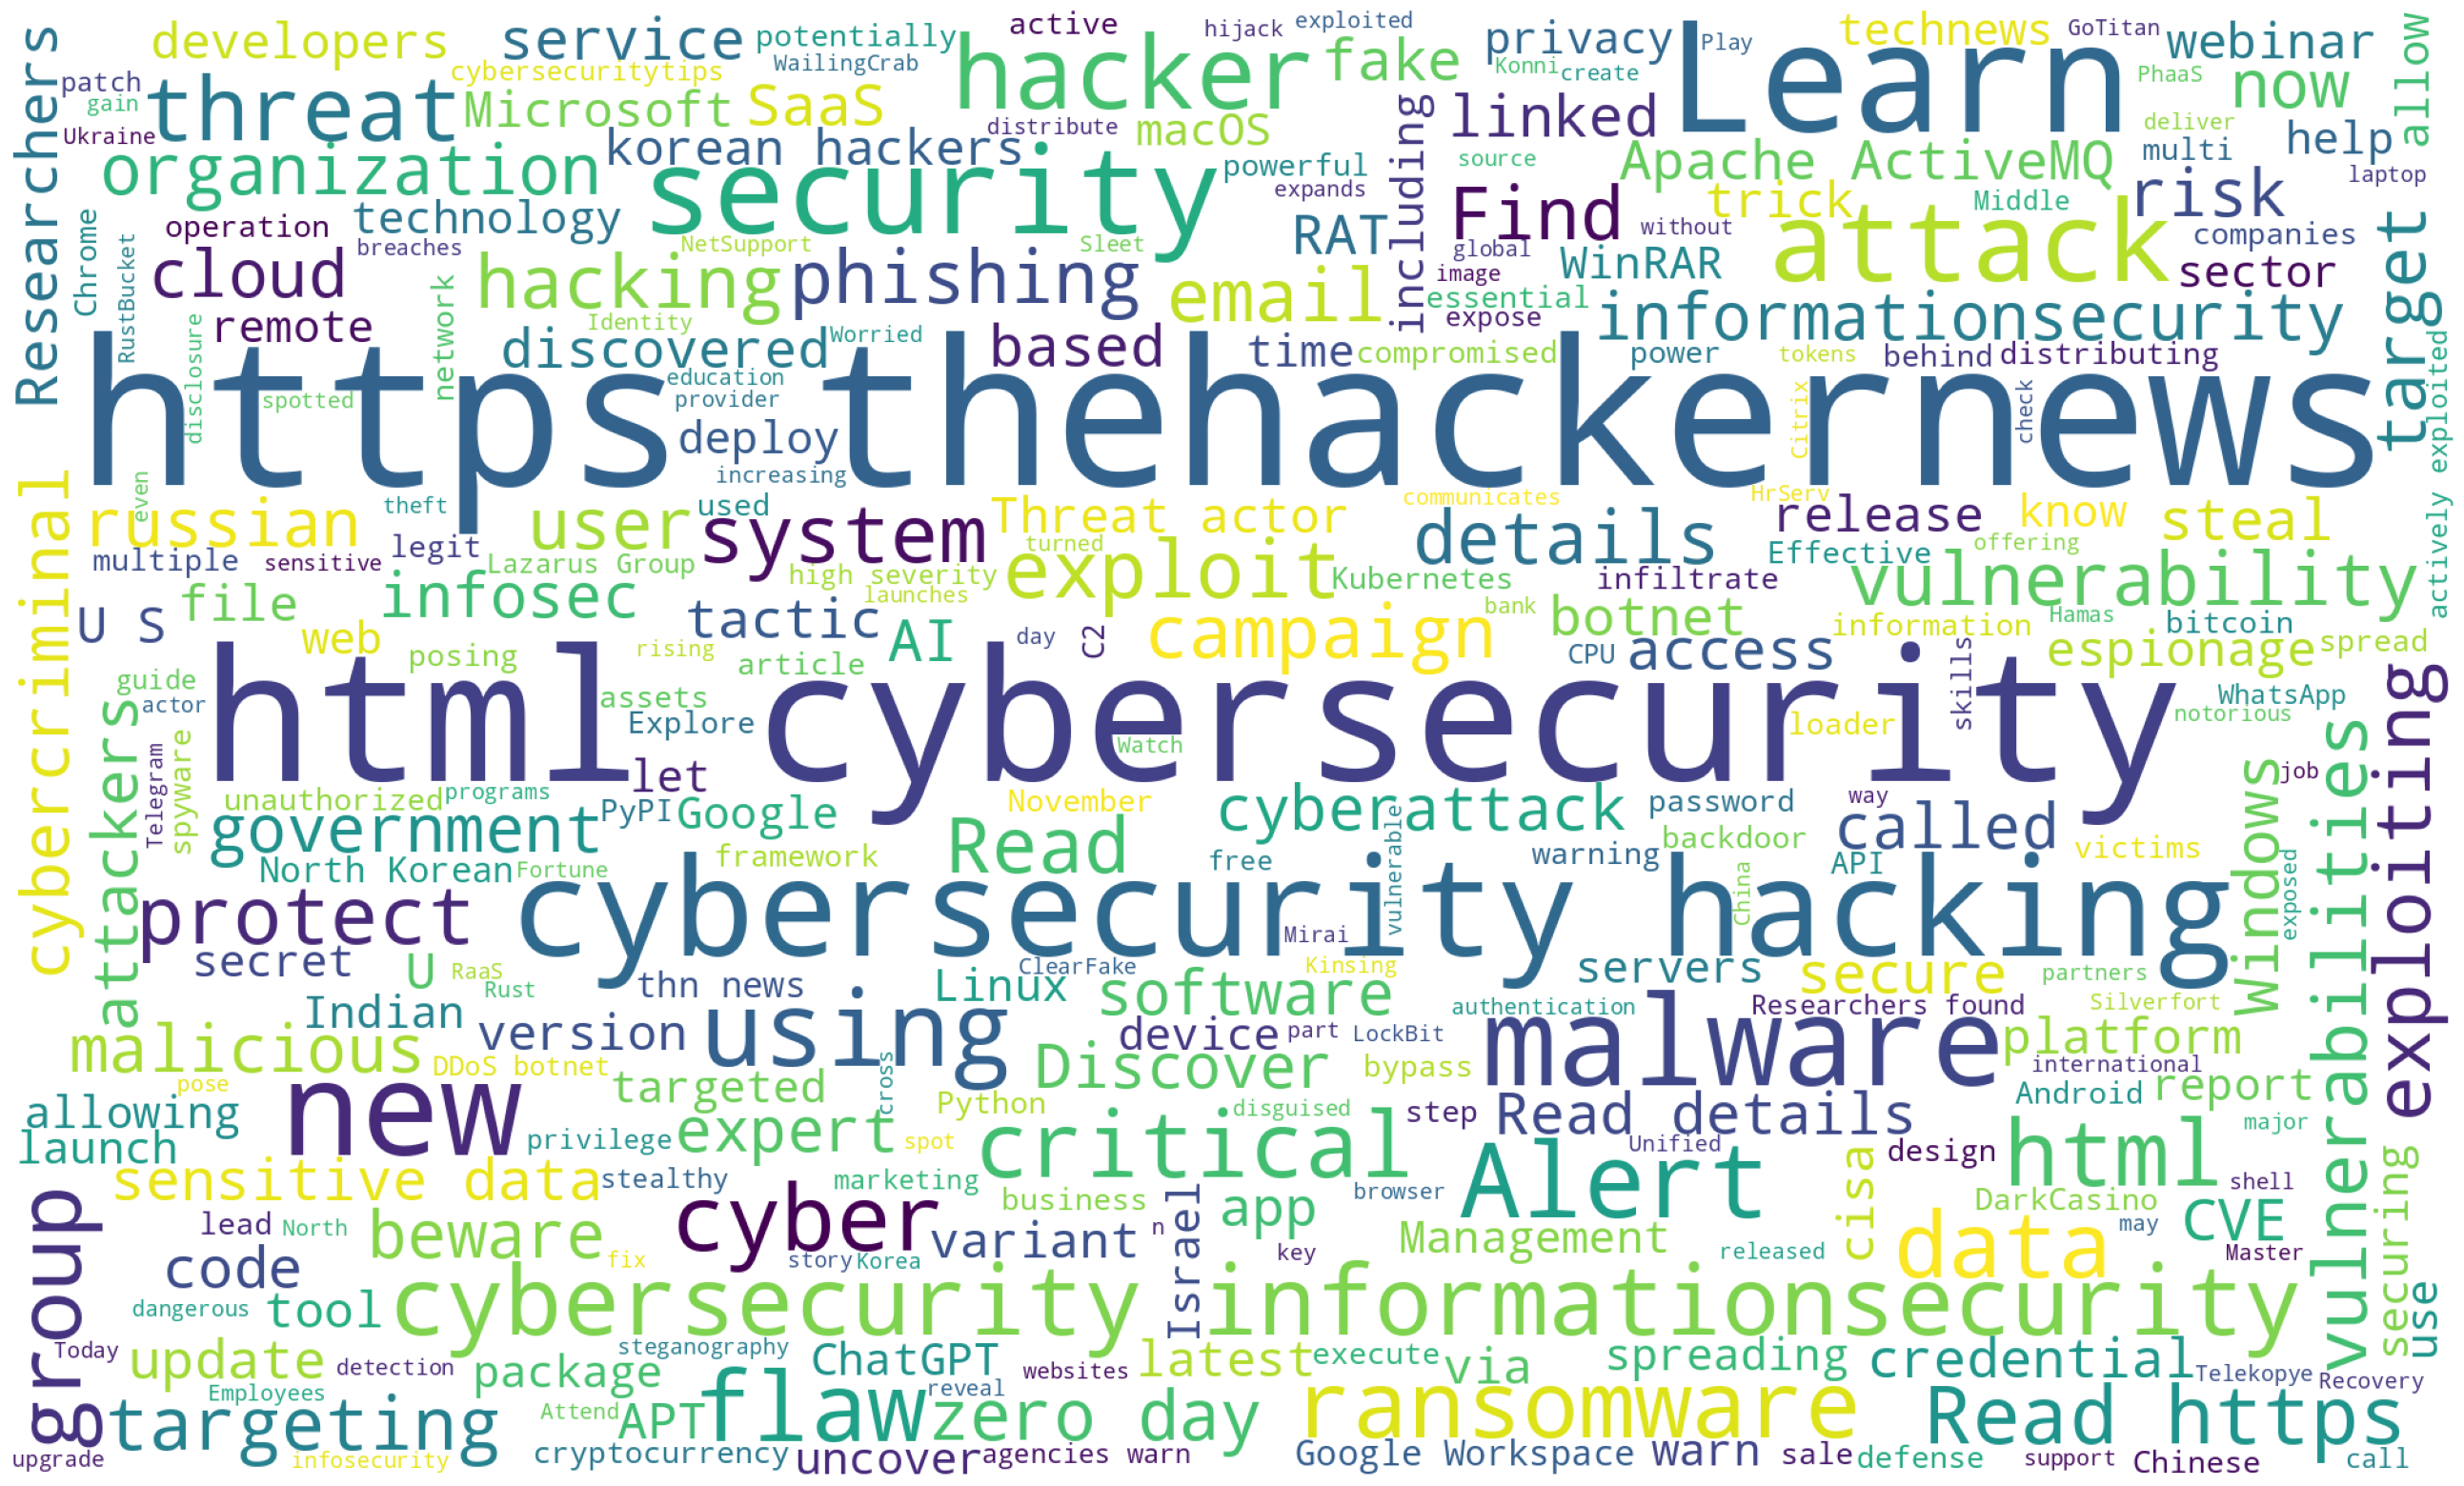

In [35]:
# T·∫°o WordCloud
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                     ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Analysis all posts

In [36]:
# T√åM B√ÄI VI·∫æT C√ì T∆Ø∆†NG T√ÅC CAO NH·∫§T
max_interaction_post = raw_df.loc[raw_df['total_interactions'].idxmax()]
print("B√†i vi·∫øt c√≥ l∆∞·ª£t t∆∞∆°ng t√°c l·ªõn nh·∫•t:\n", max_interaction_post)

B√†i vi·∫øt c√≥ l∆∞·ª£t t∆∞∆°ng t√°c l·ªõn nh·∫•t:
 post_id                                                            716395683858351
text                             üîí Multiple vulnerabilities have been discovere...
post_text                        üîí Multiple vulnerabilities have been discovere...
shared_text                      THEHACKERNEWS.COM\nNew Flaws in Fingerprint Se...
original_text                                                                  NaN
time                                                           2023-11-22 15:24:23
timestamp                                                               1700666663
image                            https://m.facebook.com/photo/view_full_size/?f...
image_lowquality                 https://external.fhan17-1.fna.fbcdn.net/emg1/v...
images                                                                          []
images_description                                                              []
images_lowquality            

In [37]:
# IN TH√îNG TIN C·ª¶A 10 B√ÄI VI·∫æT C√ì L∆Ø·ª¢NG T∆Ø∆†NG T√ÅC CAO NH·∫§T

# L·∫•y 10 b√†i vi·∫øt c√≥ s·ªë l∆∞·ª£ng t∆∞∆°ng t√°c cao nh·∫•t
top_interactions_df = raw_df.nlargest(10, 'total_interactions')

# In th√¥ng tin c·ªßa 10 b√†i vi·∫øt n√†y, bao g·ªìm c·∫£ URL
for index, row in top_interactions_df.iterrows():
    print(f"Post ID: {row['post_id']}")
    print(f"Text: {row['text']}")
    print(f"Comments: {row['comments']}")
    print(f"Shares: {row['shares']}")
    print(f"Interactions: {row['total_interactions']}")
    print(f"URL: {row['post_url']}")
    print("\n")


Post ID: 716395683858351
Text: üîí Multiple vulnerabilities have been discovered in laptop fingerprint sensors, potentially allowing attackers to bypass Windows Hello authentication on Dell, Lenovo, and Microsoft laptops.

Find out more: https://thehackernews.com/2023/11/new-flaws-in-fingerprint-sensors-let.html

#cybersecurity #hacking #privacy

THEHACKERNEWS.COM
New Flaws in Fingerprint Sensors Let Attackers Bypass Windows Hello Login
Comments: 58
Shares: 244
Interactions: 1480
URL: https://facebook.com/thehackernews/posts/716395683858351


Post ID: 709029964594923
Text: Attention Azure users! Researchers have developed a fully undetectable cloud-based #cryptocurrency miner that can operate without paying any charges.

Get the details here: https://thehackernews.com/2023/11/researchers-uncover-undetectable-crypto.html

#cybersecurity #technology #hacking #informationsecurity

THEHACKERNEWS.COM
Researchers Uncover Undetectable Crypto Mining Technique on Azure Automation
Comments: 40


C√°c m·ªëc th·ªùi gian trong ng√†y m√† Fanpage  ƒëƒÉng b√†i vi·∫øt:

    time (hour)  count
0             3      2
1             4      6
2             5      8
3             6      7
4             7      7
5             8      3
6             9      4
7            10     11
8            11      9
9            12     16
10           13     13
11           14      4
12           15      5
13           16      3
14           17      2


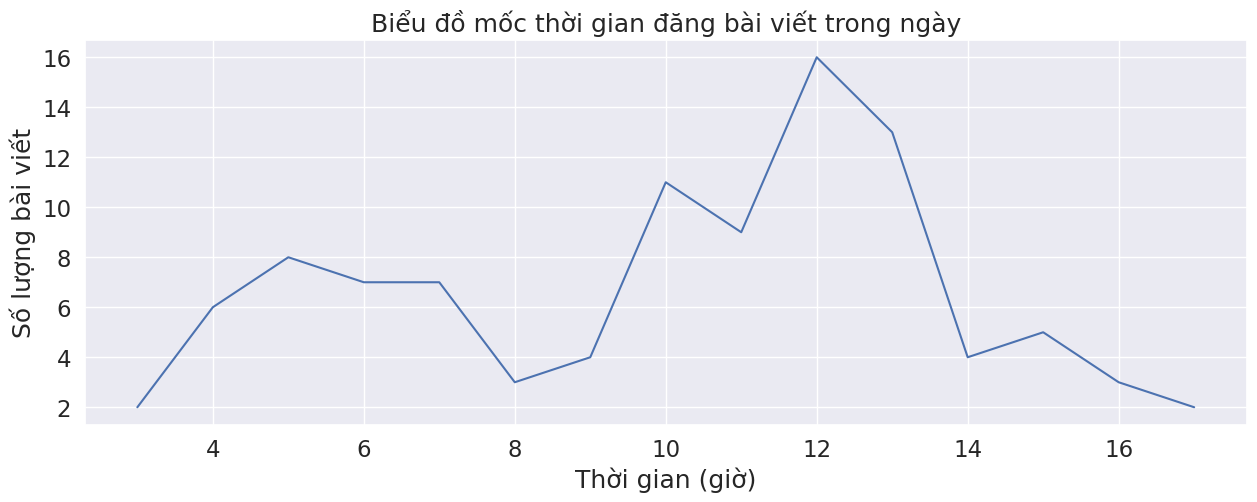

In [38]:
# TH√îNG TIN  M·ªêC TH·ªúI GIAN ƒêƒÇNG B√ÄI 

# Chuy·ªÉn ƒë·ªïi c·ªôt 'time' th√†nh ƒë·ªãnh d·∫°ng datetime
raw_df['time'] = pd.to_datetime(raw_df['time'])

# T·∫°o c·ªôt 'hour' t·ª´ c·ªôt 'time'
raw_df['hour'] = raw_df['time'].dt.hour

# T√≠nh t·ªïng s·ªë b√†i vi·∫øt theo gi·ªù
hourly_posts = raw_df['hour'].value_counts().sort_index()

# T·∫°o DataFrame m·ªõi v·ªõi hai c·ªôt l√† 'time' v√† 'count'
hourly_posts_df = pd.DataFrame({'time (hour)': hourly_posts.index, 'count': hourly_posts.values})

print("C√°c m·ªëc th·ªùi gian trong ng√†y m√† Fanpage  ƒëƒÉng b√†i vi·∫øt:\n")
print(hourly_posts_df)

# V·∫Ω bi·ªÉu ƒë·ªì
plt.plot(hourly_posts_df['time (hour)'], hourly_posts_df['count'])
plt.xlabel('Th·ªùi gian (gi·ªù)')
plt.ylabel('S·ªë l∆∞·ª£ng b√†i vi·∫øt')
plt.title('Bi·ªÉu ƒë·ªì m·ªëc th·ªùi gian ƒëƒÉng b√†i vi·∫øt trong ng√†y')
plt.show()

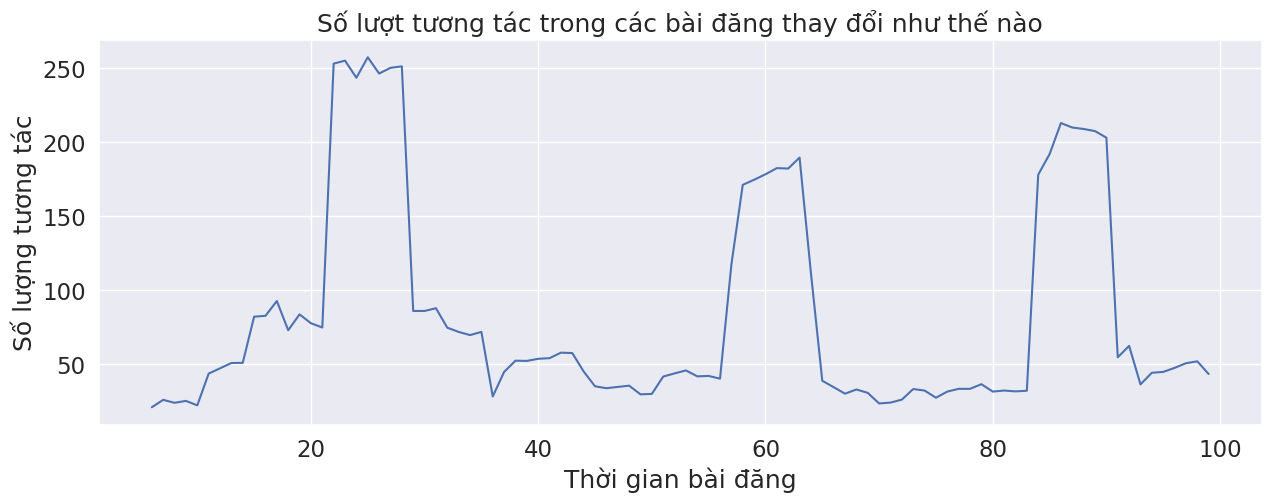

In [39]:
# XEM S·ªê L∆Ø·ª¢T T∆Ø∆†NG T√ÅC TRONG C√ÅC B√ÄI ƒêƒÇNG BI·∫æN ƒê·ªîI NH∆Ø TH·∫æ N√ÄO

interaction_trend = raw_df['total_interactions'].rolling(window=7).mean()
interaction_trend.plot()
plt.title("S·ªë l∆∞·ª£t t∆∞∆°ng t√°c trong c√°c b√†i ƒëƒÉng thay ƒë·ªïi nh∆∞ th·∫ø n√†o")
plt.xlabel("Th·ªùi gian b√†i ƒëƒÉng")
plt.ylabel("S·ªë l∆∞·ª£ng t∆∞∆°ng t√°c")
plt.show()

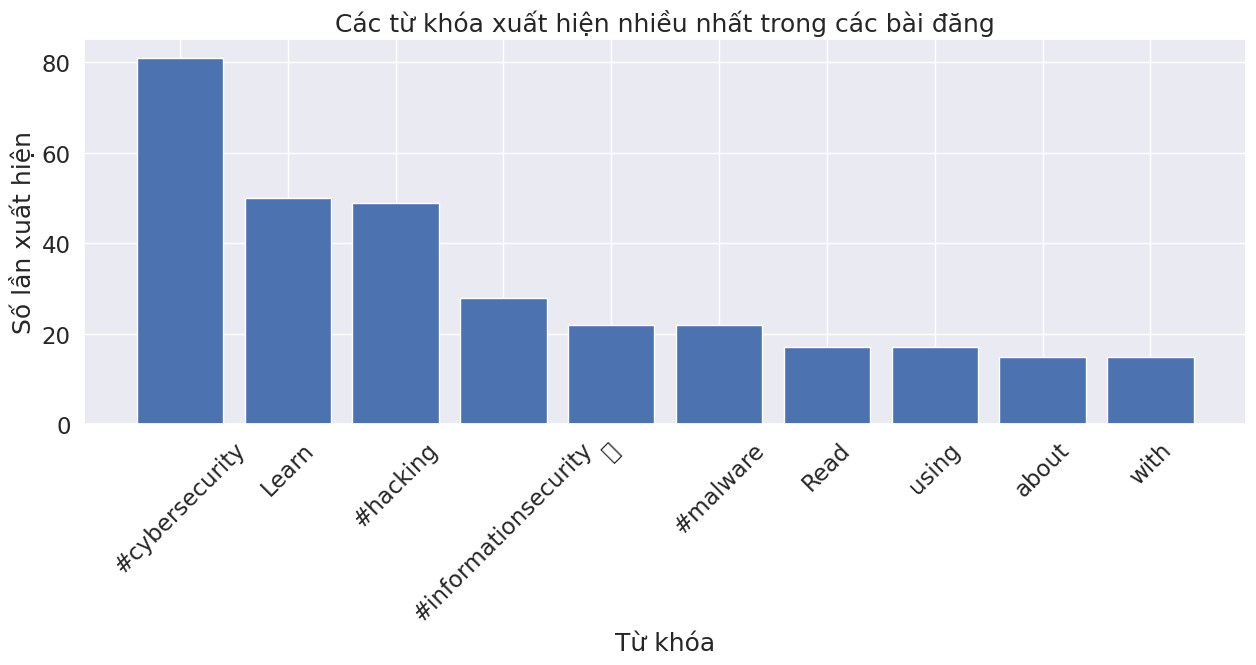

In [42]:
#T√åM T·ª™ KH√ìA XU·∫§T HI·ªÜN NHI·ªÄU NH·∫§T

# Danh s√°ch c√°c t·ª´ kh√¥ng mong mu·ªën
stopwords = ['and', 'to', 'a',  'in','the', 'more', 'your','of', 'more:', 'how', 'on:', 'for','on', 'is', 'read','are']

# T√≠nh to√°n s·ªë l·∫ßn xu·∫•t hi·ªán c·ªßa t·ª´ng t·ª´
word_counts = Counter(word for word in ' '.join(raw_df['post_text']).split() if word not in stopwords)

# L·∫•y ra 10 t·ª´ xu·∫•t hi·ªán nhi·ªÅu nh·∫•t
most_common_words = word_counts.most_common(10)

# T·∫°o DataFrame m·ªõi t·ª´ danh s√°ch c√°c t·ª´ kh√≥a xu·∫•t hi·ªán nhi·ªÅu nh·∫•t
most_common_words_df = pd.DataFrame(most_common_words, columns=['T·ª´ kh√≥a', 'S·ªë l·∫ßn xu·∫•t hi·ªán'])

# V·∫Ω bi·ªÉu ƒë·ªì c·ªôt
plt.bar(most_common_words_df['T·ª´ kh√≥a'], most_common_words_df['S·ªë l·∫ßn xu·∫•t hi·ªán'])
plt.xlabel('T·ª´ kh√≥a')
plt.ylabel('S·ªë l·∫ßn xu·∫•t hi·ªán')
plt.title('C√°c t·ª´ kh√≥a xu·∫•t hi·ªán nhi·ªÅu nh·∫•t trong c√°c b√†i ƒëƒÉng')
plt.xticks(rotation=45)
plt.show()


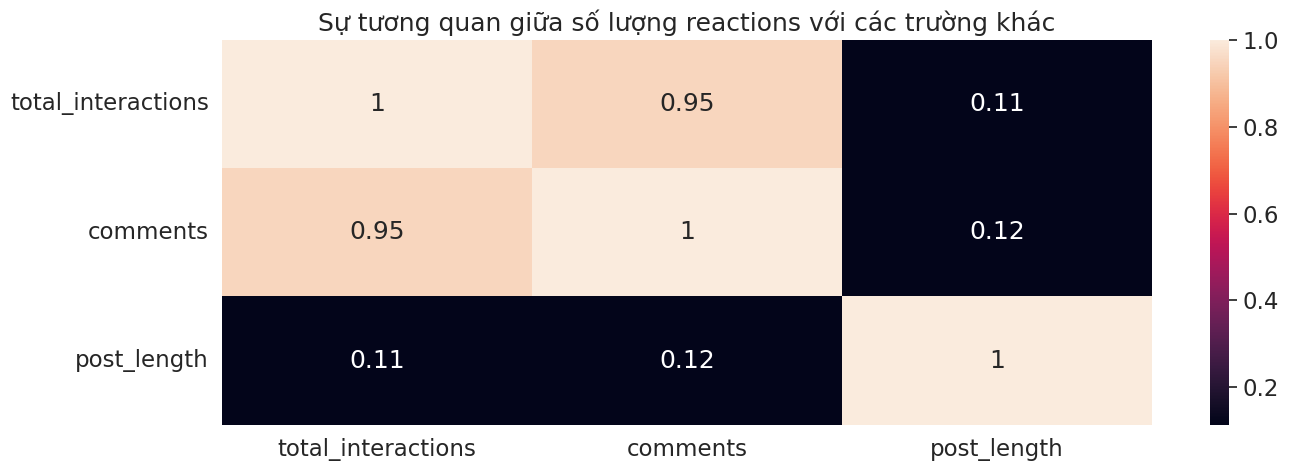

In [43]:
# T·∫°o m·ªôt c·ªôt m·ªõi 'post_length' l√† ƒë·ªô d√†i c·ªßa 'post_text'
raw_df['post_length'] = raw_df['post_text'].apply(len)

# T√¨m s·ª± t∆∞∆°ng quan gi·ªØa s·ªë l∆∞·ª£ng reactions v·ªõi c√°c tr∆∞·ªùng kh√°c nh∆∞ s·ªë l∆∞·ª£ng b√¨nh lu·∫≠n, ƒë·ªô d√†i b√†i vi·∫øt
correlation_matrix = raw_df[['total_interactions', 'comments', 'post_length']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title("S·ª± t∆∞∆°ng quan gi·ªØa s·ªë l∆∞·ª£ng reactions v·ªõi c√°c tr∆∞·ªùng kh√°c")
plt.show()

In [49]:


# T·∫°o m·ªôt ƒë·ªëi t∆∞·ª£ng CountVectorizer
vectorizer = CountVectorizer(max_features=1000)

# Chuy·ªÉn ƒë·ªïi chu·ªói vƒÉn b·∫£n th√†nh ma tr·∫≠n ƒë·∫øm t·ª´
X = vectorizer.fit_transform(raw_df['post_text'])
feature_names = vectorizer.get_feature_names_out()

# Chuy·ªÉn ƒë·ªïi ma tr·∫≠n ƒë·∫øm t·ª´ th√†nh DataFrame
dense = X.todense()
df = pd.DataFrame(dense, columns=feature_names)

print("ƒê·∫øm t·ª´ cho m·ªói b√†i ƒëƒÉng:\n", df)

ƒê·∫øm t·ª´ cho m·ªói b√†i ƒëƒÉng:
     000  10  11  16  17  2011  2015  2022  2023  20592  ...  worried  wrong  \
0     0   0   1   0   0     0     0     0     2      0  ...        0      0   
1     0   0   1   0   0     0     0     0     2      0  ...        0      0   
2     0   0   1   0   0     0     0     0     1      0  ...        1      0   
3     0   0   1   0   0     0     0     0     1      0  ...        0      0   
4     0   0   0   0   0     0     0     0     1      0  ...        0      0   
..  ...  ..  ..  ..  ..   ...   ...   ...   ...    ...  ...      ...    ...   
95    0   0   1   0   0     0     0     0     1      0  ...        0      0   
96    0   0   1   0   0     0     0     0     1      0  ...        0      0   
97    0   0   1   0   0     0     0     0     1      0  ...        0      0   
98    0   0   1   0   0     0     0     0     1      0  ...        0      0   
99    0   0   1   0   0     0     0     0     1      0  ...        0      0   

    wxpert  xm 

In [46]:
# Ph√¢n t√≠ch c·∫£m x√∫c
raw_df['polarity'] = raw_df['post_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
raw_df['subjectivity'] = raw_df['post_text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
print("C·∫£m x√∫c trung b√¨nh c·ªßa c√°c b√†i ƒëƒÉng:\n", raw_df[['polarity', 'subjectivity']].mean())

C·∫£m x√∫c trung b√¨nh c·ªßa c√°c b√†i ƒëƒÉng:
 polarity        0.172475
subjectivity    0.517251
dtype: float64


In [47]:
#T√åM B√ÄI VI·∫æT LI√äN QUAN ƒê·∫æN  H·ªåC HACK

# T·∫°o m·ªôt danh s√°ch c√°c c·ª•m t·ª´ li√™n quan ƒë·∫øn h·ªçc hack
keywords = ["learn cybersecurity", "learn ethical hacker", "learn hacking", "hacking course", "cybersecurity course","learn","ceh"]

# T√¨m t·∫•t c·∫£ c√°c b√†i vi·∫øt c√≥ ch·ª©a √≠t nh·∫•t m·ªôt trong c√°c c·ª•m t·ª´ tr√™n
related_posts_df = raw_df[raw_df['text'].apply(lambda x: any(keyword in x for keyword in keywords))]

# In th√¥ng tin c·ªßa c√°c b√†i vi·∫øt n√†y, bao g·ªìm c·∫£ URL
for index, row in related_posts_df.iterrows():
    print(f"Post ID: {row['post_id']}")
    print(f"Text: {row['text']}")
    print(f"Comments: {row['comments']}")
    print(f"Shares: {row['shares']}")
    print(f"Interactions: {row['total_interactions']}")
    print(f"URL: {row['post_url']}")
    print("\n")


Post ID: 712659784231941
Text: U.S. Government Dismantles Global IPStorm Botnet Network!

From Windows to #Linux, Mac, and #Android, the botnet turned infected devices into proxies for illegal activities.

Click to learn more: https://thehackernews.com/2023/11/us-takes-down-ipstorm-botnet-russian.html

#malware #cybersecurity #hacking

THEHACKERNEWS.COM
U.S. Takes Down IPStorm Botnet, Russian-Moldovan Mastermind Pleads Guilty
Comments: 2
Shares: 7
Interactions: 28
URL: https://facebook.com/thehackernews/posts/712659784231941


